In [41]:
%matplotlib inline
import qiskit
from qiskit import *

from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
IBMQ.load_account();provider = IBMQ.get_provider()
sim = Aer.get_backend('qasm_simulator'); vector_sim = Aer.get_backend('statevector_simulator'); qcomp = provider.get_backend('ibmqx2')

print(qiskit.__qiskit_version__)

ibmqfactory.load_account:WARNING:2020-06-28 11:30:07,061: Credentials are already in use. The existing account in the session will be replaced.


{'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.2', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.2', 'qiskit-aqua': '0.7.1', 'qiskit': '0.19.3'}


what is the target value   00


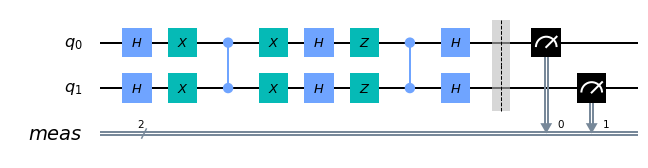

In [42]:
#This code implements the Grover's algorithm. Note that grover's algorithm is only meant for finding the location of objects, so you need to know what the object is.
#Defining How many Elements are there. If N is number of elemetns, then N = 2^n qubits.
n = 2
qc = QuantumCircuit(n)

#Put all qubits in equal superposition
for i in range(n):
    qc.h(i)

marked_val = input("what is the target value   ")
# Different marked values have different circuits. 

if marked_val == '00':
    for i in range(n):
        qc.x(i)
    qc.cz(0, 1)
    for i in range(n):
        qc.x(i)

elif marked_val == '11':
    qc.cz(0, 1)

elif marked_val == '01':
    qc.x(0)
    qc.cz(0, 1)
    qc.x(0)
elif marked_val == '10':
    qc.x(1)
    qc.cz(0, 1)
    qc.x(1)
else:
    print("Choose an appropriate video")

    
#We also need to apply a rotation to increase amplitude of marked qubit
for i in range(n):
    qc.h(i)

for i in range(n):
    qc.z(i)
qc.cz(0, 1)

#Finally Bring qubits out of superposition
for i in range(n):
    qc.h(i)

#Measure all qubits for the result
qc.measure_all()
qc.draw('mpl')


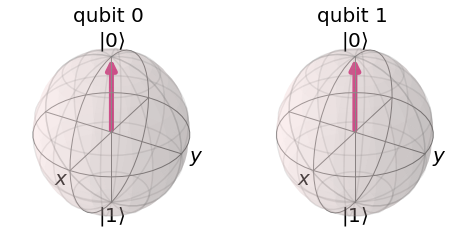

In [43]:
job_vector = execute(qc, vector_sim)
state_vec = job_vector.result().get_statevector()
plot_bloch_multivector(state_vec)

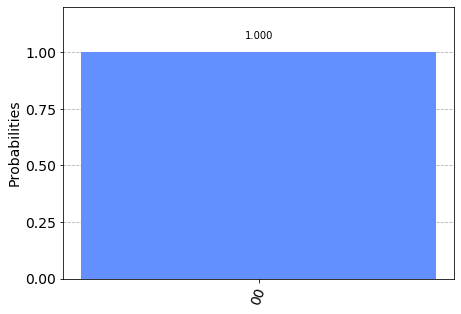

In [44]:
shots = 1024
results = execute(qc, backend=sim, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Job Status: job has successfully run


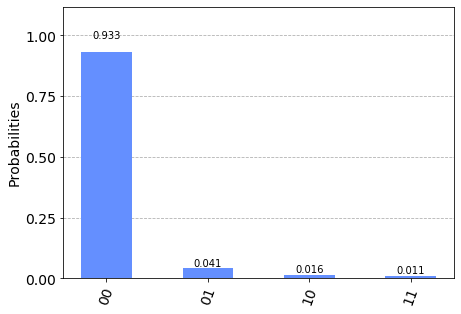

In [47]:
#Testing on Quantum Computer
job = execute(qc, backend=qcomp, shots=shots)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts())

In [48]:
#Apart from minor errors, results show what is expected